In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
df_all404_csvdata = pd.read_csv('/content/gdrive/My Drive/Master thesis/df_ts_records_all404_patients.csv')
print(df_all404_csvdata.shape)
df_all404_csvdata['TIME'] =  pd.to_datetime(df_all404_csvdata['TIME'])

(2530520, 10)


In [ ]:
print(df_all404_csvdata.columns)
print(df_all404_csvdata[df_all404_csvdata['ICUSTAY_ID'].isin([
297252,
296758,
295203,
293716,
290855,
288099,
287061,
284941,
274436,
270673,
268546,
266459,
264657,
260895,
260687,
258086,
242641,
239475,
235055,
230039,
225130,
224391,
222479,
222450,
221656,
221587,
220949,
213181,
202965]
)].drop_duplicates('ICUSTAY_ID').groupby('ICUSTAY_ID').head(10))

Index(['SUBJECT_ID', 'ICUSTAY_ID', 'RECORD', 'TIME', 'HR', 'SPO2', 'ABPSYS',
       'ABPDIAS', 'ABPMEAN', 'RESP'],
      dtype='object')
         SUBJECT_ID  ICUSTAY_ID  ... ABPMEAN RESP
132946        44600      220949  ...     NaN  NaN
184280        45805      222450  ...     NaN  NaN
393503        55090      274436  ...     NaN  NaN
645476        66880      260687  ...     NaN  NaN
1582343       95088      295203  ...     NaN  NaN
1787820       99707      258086  ...     NaN  NaN

[6 rows x 10 columns]


In [ ]:
df = df_all404_csvdata.drop_duplicates('SUBJECT_ID').groupby('SUBJECT_ID').head(10)
print(df['SUBJECT_ID'])

In [ ]:
#df_test_gaps.drop(df_test_gaps.index, inplace=True)
df_test_gaps = df_all404_csvdata[df_all404_csvdata['SUBJECT_ID']== 55090 ] #98930
print(df_test_gaps[['TIME','HR', 'SPO2','ABPSYS','ABPDIAS','ABPMEAN','RESP']])

"""
df_test_gaps_1= df_test_gaps[df_test_gaps[['HR', 'SPO2','ABPSYS','ABPDIAS','ABPMEAN','RESP']].notna().any(axis=1)]
print(df_test_gaps_1[['TIME','HR', 'SPO2','ABPSYS','ABPDIAS','ABPMEAN','RESP']])
"""

                      TIME  HR  SPO2  ABPSYS  ABPDIAS  ABPMEAN  RESP
393503 2166-12-10 13:33:55 NaN   NaN     NaN      NaN      NaN   NaN
393504 2166-12-10 13:34:55 NaN   NaN     NaN      NaN      NaN   NaN
393505 2166-12-10 13:35:55 NaN   NaN     NaN      NaN      NaN   NaN
393506 2166-12-10 13:36:55 NaN   NaN     NaN      NaN      NaN   NaN
393507 2166-12-10 13:37:55 NaN   NaN     NaN      NaN      NaN   NaN
...                    ...  ..   ...     ...      ...      ...   ...
395282 2166-12-11 19:11:56 NaN   NaN     NaN      NaN      NaN   NaN
395283 2166-12-11 19:12:56 NaN   NaN     NaN      NaN      NaN   NaN
395284 2166-12-11 19:13:56 NaN   NaN     NaN      NaN      NaN   NaN
395285 2166-12-11 19:14:56 NaN   NaN     NaN      NaN      NaN   NaN
395286 2166-12-11 19:15:56 NaN   NaN     NaN      NaN      NaN   NaN

[1784 rows x 7 columns]


"\ndf_test_gaps_1= df_test_gaps[df_test_gaps[['HR', 'SPO2','ABPSYS','ABPDIAS','ABPMEAN','RESP']].notna().any(axis=1)]\nprint(df_test_gaps_1[['TIME','HR', 'SPO2','ABPSYS','ABPDIAS','ABPMEAN','RESP']])\n"

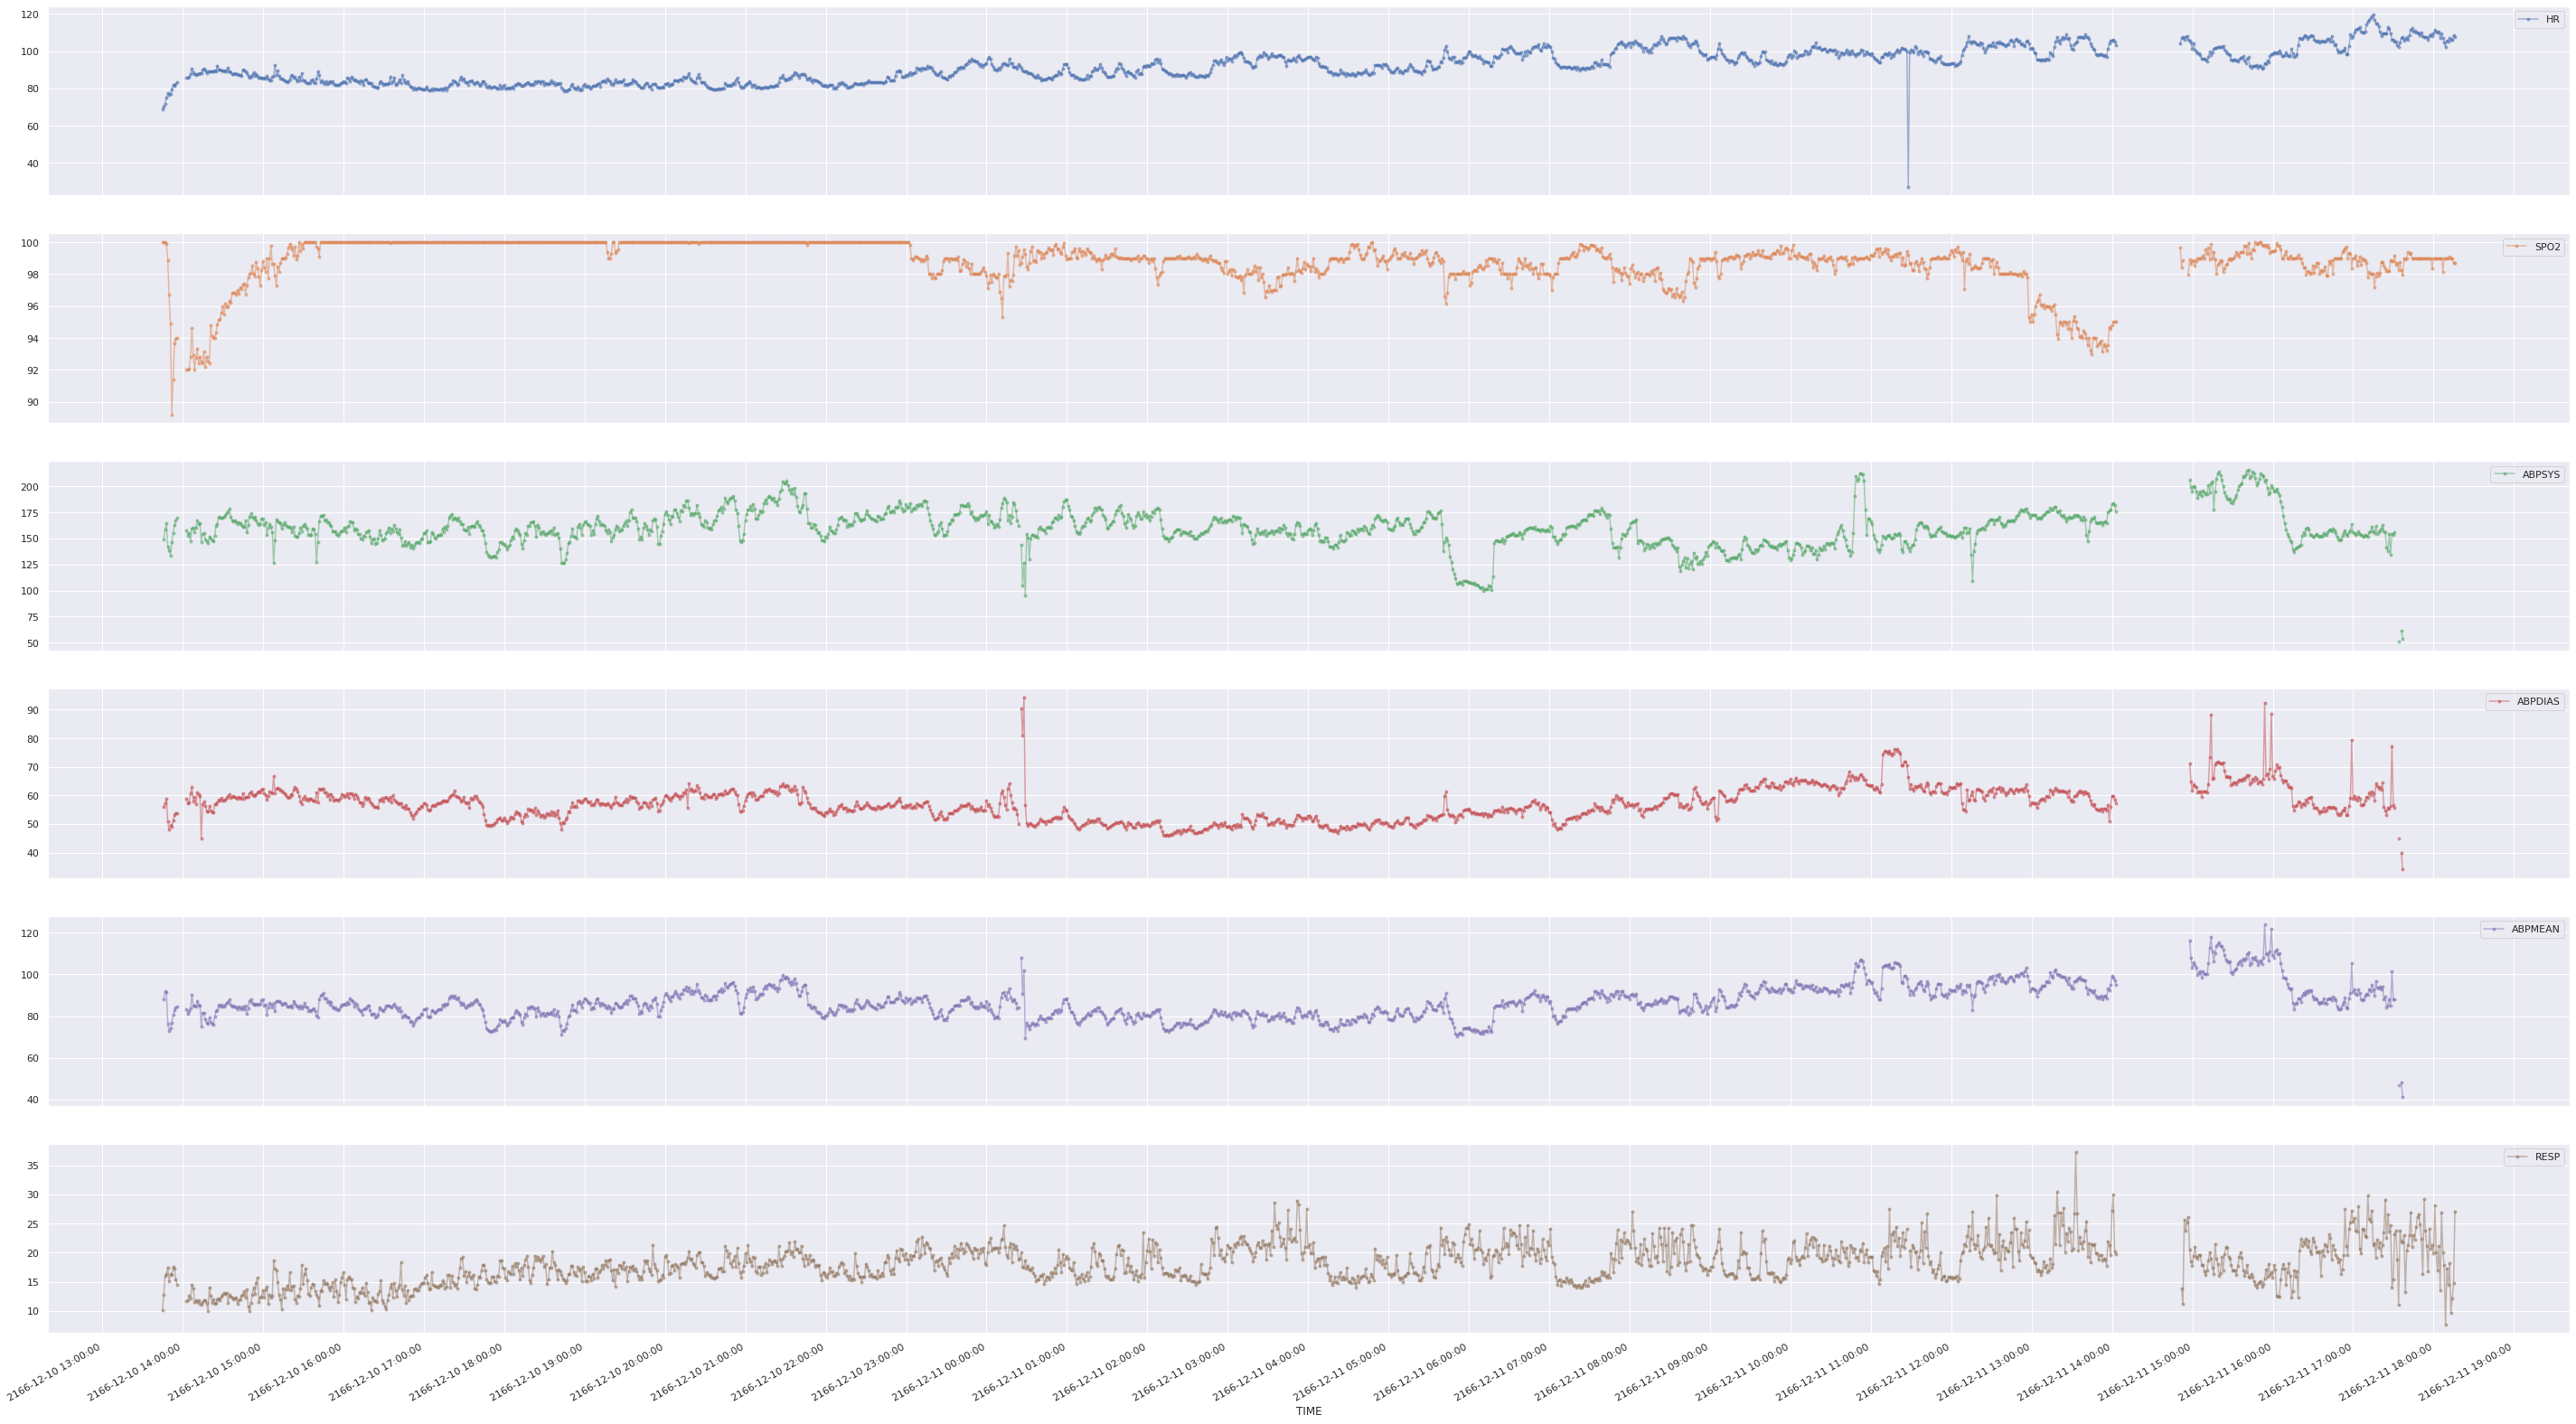

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.dates import DateFormatter

import matplotlib.dates as mdates

date_form = DateFormatter('%Y-%m-%d %H:%M:%S')

sns.set(rc={'figure.figsize':(20, 10)})
cols_plot = ['HR', 'SPO2','ABPSYS','ABPDIAS','ABPMEAN','RESP']
df_test_gaps=df_test_gaps.set_index('TIME')
ax = df_test_gaps[cols_plot].plot(marker='.', alpha = 0.5,figsize=(50, 30), subplots=True, x_compat=True)
print(ax)
count =0 
for i in ax: 
  i.xaxis.set_major_formatter(date_form)
  i.xaxis.set_major_locator(mdates.HourLocator(interval=1))

p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: -0.022629796677320346
Skewness of  distribution: 0.30884907680638135


'\n!pip install Fitter\nfrom fitter import Fitter\nf = Fitter(df_all404_csvdata_HR.HR)\nf.fit()\n'

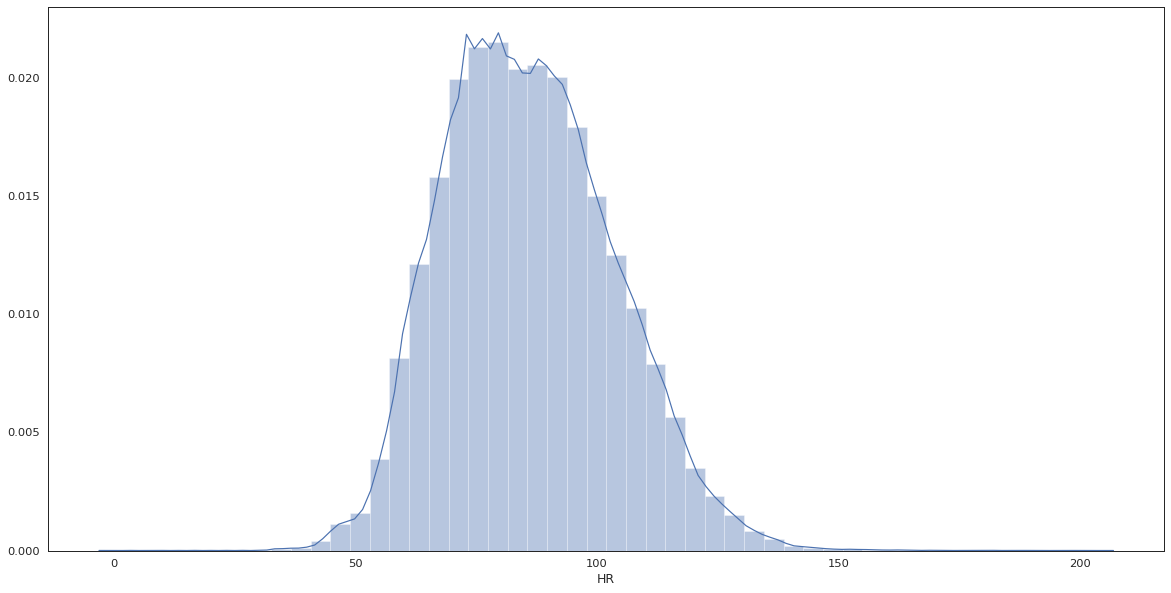

In [ ]:
from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
#print(df_all394_csvdata)

df_all404_csvdata_HR = df_all404_csvdata.dropna(subset=['HR']) 


stat, p = stats.normaltest(df_all404_csvdata_HR.HR)
print('p=%.3f' %  p)
alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_csvdata_HR.HR);
print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_csvdata_HR.HR)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_csvdata_HR.HR)))
"""
!pip install Fitter
from fitter import Fitter
f = Fitter(df_all404_csvdata_HR.HR)
f.fit()
"""

Statistics=80955.293, p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of normal distribution: 1.5652175391650696
Skewness of normal distribution: 0.18962415420274034


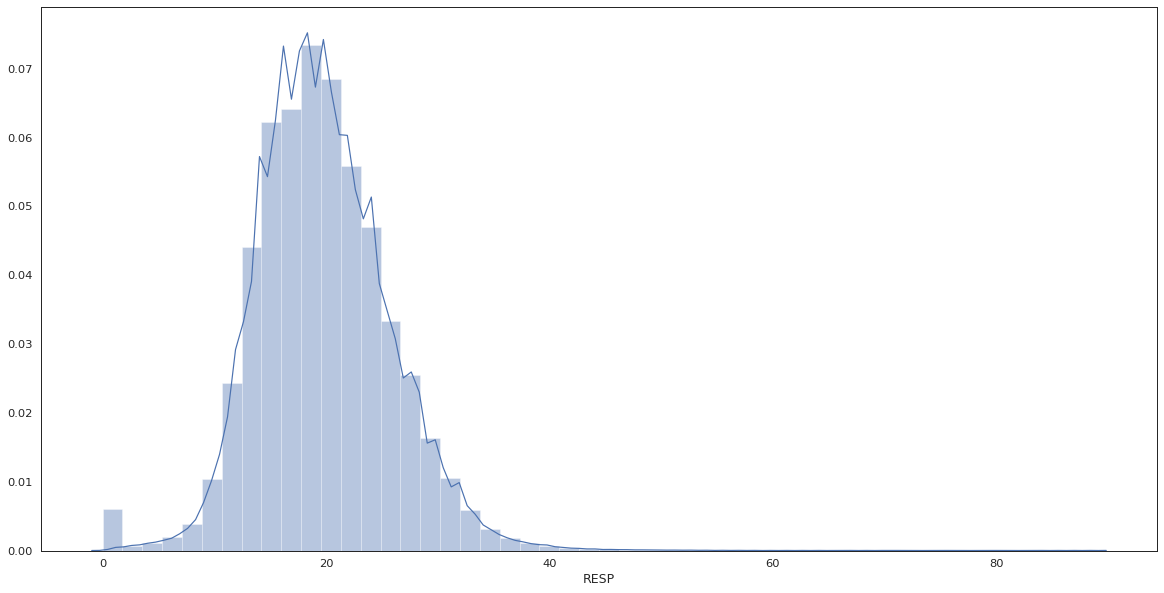

In [ ]:

df_all404_csvdata_RESP = df_all404_csvdata.dropna(subset=['RESP']) 


stat, p = stats.normaltest(df_all404_csvdata_RESP.RESP)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_csvdata_RESP.RESP);
print('Kurtosis of normal distribution: {}'.format(stats.kurtosis
                                                      (df_all404_csvdata_RESP.RESP)))
print('Skewness of normal distribution: {}'.format(stats.skew
                                                      (df_all404_csvdata_RESP.RESP)))



Statistics=65497.356, p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of normal distribution: 1.4388733273563927
Skewness of normal distribution: 0.2795234283202372


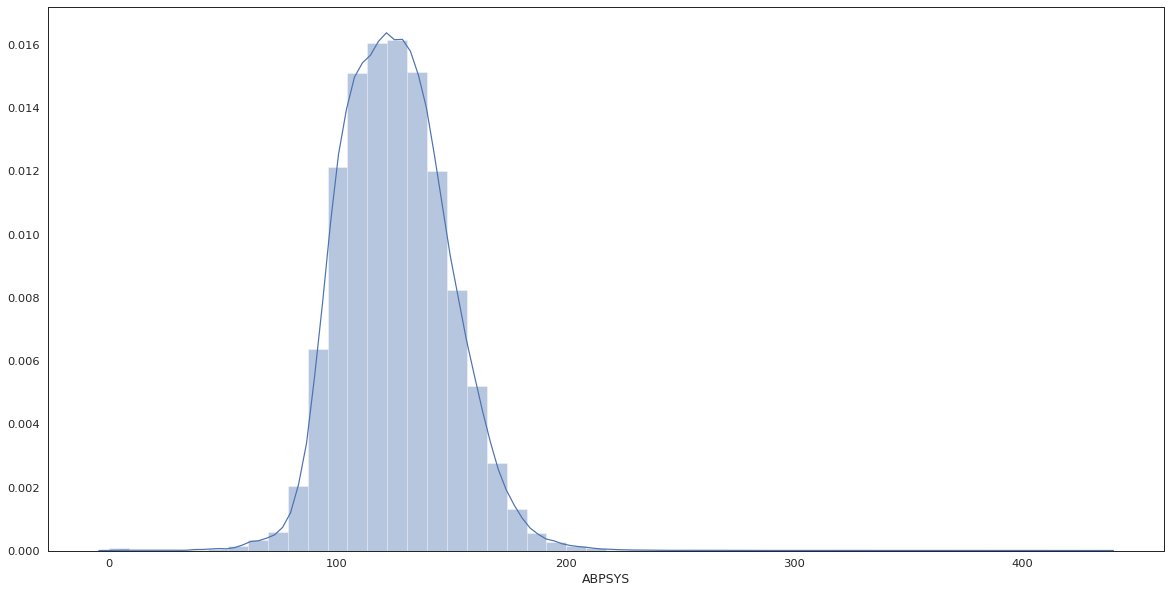

In [ ]:
from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
df_all404_csvdata.ABPSYS = df_all404_csvdata.ABPSYS.mask(df_all404_csvdata.ABPSYS.lt(0),0)

df_all404_csvdata_ABPSYS = df_all404_csvdata.dropna(subset=['ABPSYS']) 


stat, p = stats.normaltest(df_all404_csvdata_ABPSYS.ABPSYS)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_csvdata_ABPSYS.ABPSYS);
print('Kurtosis of normal distribution: {}'.format(stats.kurtosis
                                                      (df_all404_csvdata_ABPSYS.ABPSYS)))
print('Skewness of normal distribution: {}'.format(stats.skew
                                                      (df_all404_csvdata_ABPSYS.ABPSYS)))



Statistics=734526.128, p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of normal distribution: 16.439062612805678
Skewness of normal distribution: 1.8441590999209188


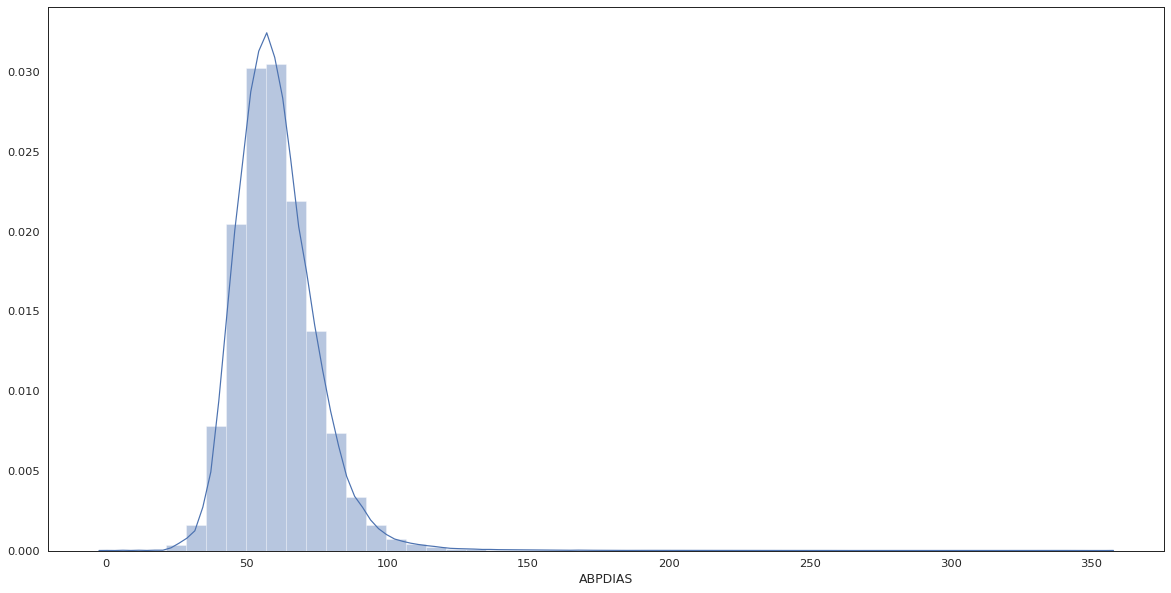

In [ ]:
df_all404_csvdata.ABPDIAS = df_all404_csvdata.ABPDIAS.mask(df_all404_csvdata.ABPDIAS.lt(0),0)

df_all404_csvdata_ABPDIAS = df_all404_csvdata.dropna(subset=['ABPDIAS']) 


stat, p = stats.normaltest(df_all404_csvdata_ABPDIAS.ABPDIAS)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_csvdata_ABPDIAS.ABPDIAS);
print('Kurtosis of normal distribution: {}'.format(stats.kurtosis
                                                      (df_all404_csvdata_ABPDIAS.ABPDIAS)))
print('Skewness of normal distribution: {}'.format(stats.skew
                                                      (df_all404_csvdata_ABPDIAS.ABPDIAS)))

Statistics=967115.896, p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of normal distribution: 24.707645203351856
Skewness of normal distribution: 2.4965863050096857


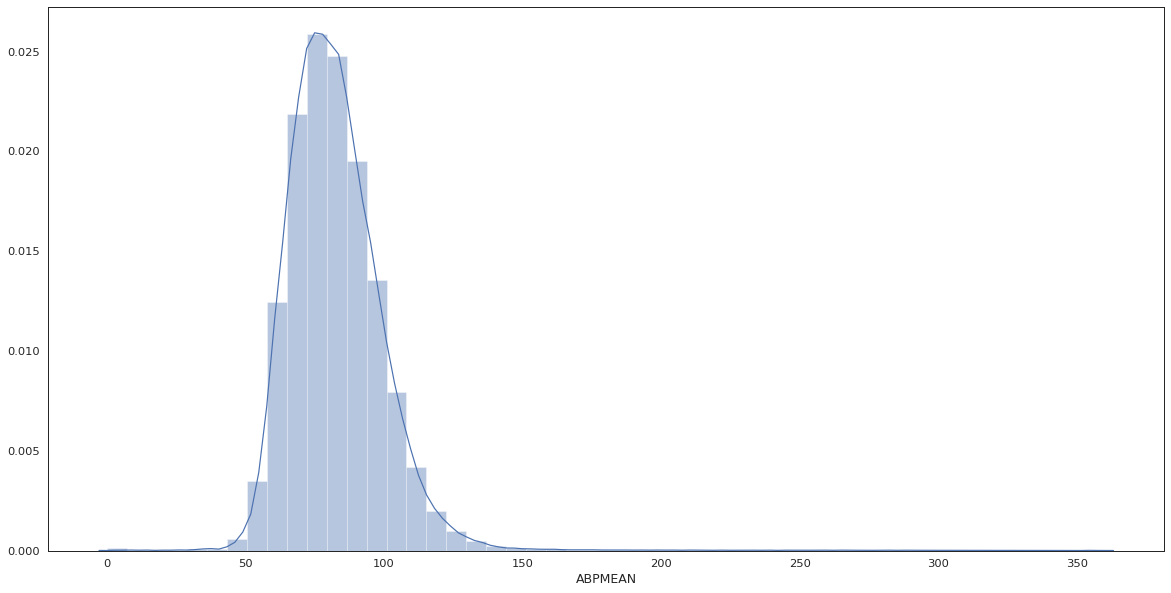

In [ ]:
df_all404_csvdata.ABPMEAN = df_all404_csvdata.ABPMEAN.mask(df_all404_csvdata.ABPMEAN.lt(0),0)

df_all404_csvdata_ABPMEAN = df_all404_csvdata.dropna(subset=['ABPMEAN']) 

stat, p = stats.normaltest(df_all404_csvdata_ABPMEAN.ABPMEAN)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_csvdata_ABPMEAN.ABPMEAN);
print('Kurtosis of normal distribution: {}'.format(stats.kurtosis
                                                      (df_all404_csvdata_ABPMEAN.ABPMEAN)))
print('Skewness of normal distribution: {}'.format(stats.skew
                                                      (df_all404_csvdata_ABPMEAN.ABPMEAN)))

Statistics=1802792.145, p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of normal distribution: 48.27112488869481
Skewness of normal distribution: -4.051964088239868


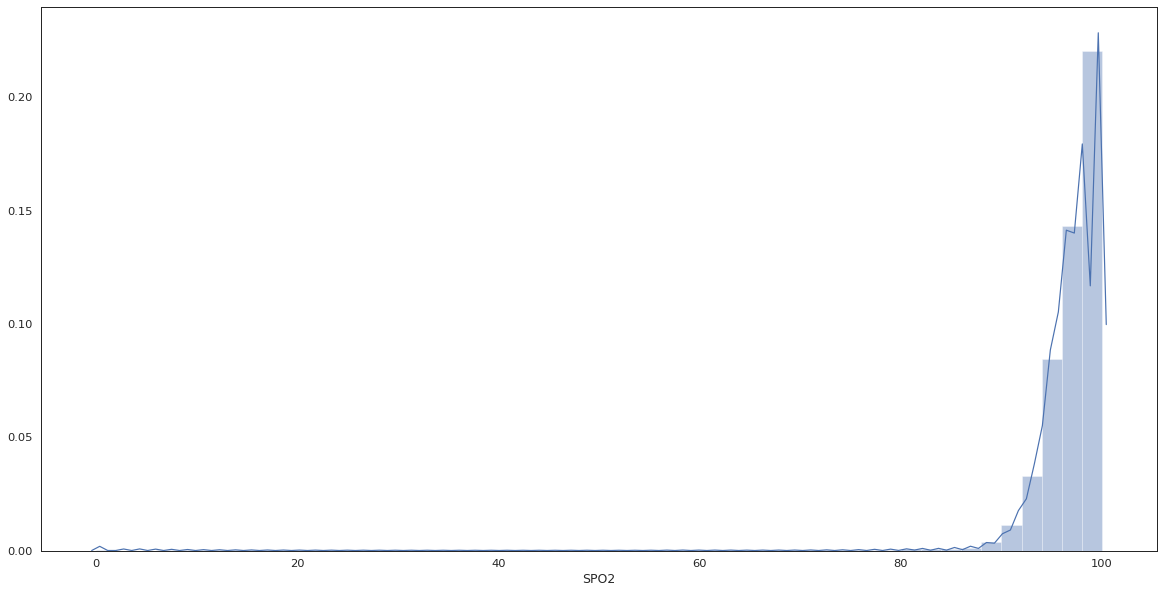

In [ ]:

df_all404_csvdata_SPO2 = df_all404_csvdata.dropna(subset=['SPO2']) 

stat, p = stats.normaltest(df_all404_csvdata_SPO2.SPO2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_csvdata_SPO2.SPO2);
print('Kurtosis of normal distribution: {}'.format(stats.kurtosis
                                                      (df_all404_csvdata_SPO2.SPO2)))
print('Skewness of normal distribution: {}'.format(stats.skew
                                                      (df_all404_csvdata_SPO2.SPO2)))

In [ ]:
"""
pd.set_option('display.max_rows', 500000)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 10000)
"""
df = df_all404_csvdata[df_all404_csvdata['SUBJECT_ID']==95118]
print(df)
df=df[['HR','ABPSYS','ABPDIAS','ABPMEAN','RESP','SPO2']]
df = df[:10]
print(df)
df=df.where(df.notnull(), 8)
print(df)

         SUBJECT_ID  ICUSTAY_ID  ... ABPMEAN       RESP
2528816       95118      232418  ...     NaN   7.833333
2528817       95118      232418  ...     NaN  10.866667
2528818       95118      232418  ...     NaN  12.062500
2528819       95118      232418  ...     NaN   7.316667
2528820       95118      232418  ...     NaN  10.333333
...             ...         ...  ...     ...        ...
2530515       95118      232418  ...     NaN        NaN
2530516       95118      232418  ...     NaN        NaN
2530517       95118      232418  ...     NaN        NaN
2530518       95118      232418  ...     NaN        NaN
2530519       95118      232418  ...     NaN        NaN

[1704 rows x 10 columns]
                HR      ABPSYS    ABPDIAS     ABPMEAN       RESP        SPO2
2528816  83.347826         NaN        NaN         NaN   7.833333         NaN
2528817  83.983333         NaN        NaN         NaN  10.866667  100.000000
2528818  85.433333         NaN        NaN         NaN  12.062500  100.0

In [ ]:
df_test_gaps = df_all404_csvdata[df_all404_csvdata['ICUSTAY_ID']== 232418]
print(df_test_gaps[['TIME','RESP']])

                       TIME       RESP
2528816 2175-11-25 10:38:08   7.833333
2528817 2175-11-25 10:39:08  10.866667
2528818 2175-11-25 10:40:08  12.062500
2528819 2175-11-25 10:41:08   7.316667
2528820 2175-11-25 10:42:08  10.333333
...                     ...        ...
2530515 2175-11-26 14:57:08        NaN
2530516 2175-11-26 14:58:08        NaN
2530517 2175-11-26 14:59:08        NaN
2530518 2175-11-26 15:00:08        NaN
2530519 2175-11-26 15:01:08        NaN

[1704 rows x 2 columns]
